In [1]:
!mkdir -p results results/dqn

In [2]:
%matplotlib inline
import pandas as pd

In [3]:
import gym
from gym.wrappers import Monitor

In [4]:
import base
from src.agents import DeepQAgent
from src.downsamplers import downsample_space_invaders

/usr/local/anaconda5/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/usr/local/anaconda5/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


# Environment

In [5]:
# Deterministic - use a static number of frames for frame skipping
# v4 - disable 25% chance of ignoring action and repeating last action
env = gym.make('SpaceInvadersDeterministic-v4')
# env = Monitor(env, './monitor/dqn/space_invaders', force=True)

In [6]:
env.observation_space

Box(210, 160, 3)

In [7]:
env.action_space

Discrete(6)

# Agent

In [8]:
agent = DeepQAgent(env, downsample_space_invaders, 
    replay_memory_size=0, 
    render_mode='rgb_array'
)
agent.model.load_weights('./models/dqn/space_invaders.h5')
agent

DeepQAgent(
    env=<TimeLimit<AtariEnv<SpaceInvadersDeterministic-v4>>>,
    downsample=Downsampler(y=(0, 15), x=(0, 1), cut=[]),
    replay_memory_size=0,
    agent_history_length=4,
    discount_factor=0.99,
    update_frequency=4,
    optimizer=<keras.optimizers.RMSprop object at 0x2b7b93648908>,
    exploration_rate=AnnealingVariable(initial_value=1.0, final_value=0.1, steps=1000000),
    null_op_max=30,
    null_op=0,
    loss=<function huber_loss at 0x2b7be389b9d8>,
    image_size=(84, 84),
    render_mode='rgb_array'
)

In [9]:
fps = None # 60
scores = agent.play(games=100, fps=fps)
scores = pd.Series(scores)
scores

100%|██████████| 100/100 [03:34<00:00,  2.14s/game]


0     32.0
1     34.0
2     24.0
3     26.0
4     19.0
5     22.0
6     16.0
7     28.0
8     33.0
9     26.0
10    29.0
11    25.0
12    24.0
13    21.0
14    19.0
15    28.0
16    15.0
17    25.0
18    22.0
19    33.0
20    21.0
21    30.0
22    24.0
23    23.0
24    24.0
25    27.0
26    17.0
27    23.0
28    49.0
29    29.0
      ... 
70    18.0
71    25.0
72    34.0
73    29.0
74    31.0
75    32.0
76    32.0
77    33.0
78    24.0
79    17.0
80    19.0
81    22.0
82    36.0
83    25.0
84    22.0
85    34.0
86    34.0
87    29.0
88    28.0
89    32.0
90    28.0
91    26.0
92    33.0
93    26.0
94    26.0
95    23.0
96    26.0
97    29.0
98    21.0
99    28.0
Length: 100, dtype: float64

In [10]:
scores.to_csv('results/dqn/fullydeterministic.csv')

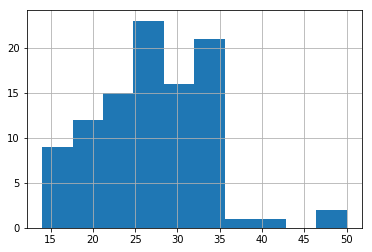

In [11]:
_ = scores.hist()

In [12]:
scores.describe()

count    100.00000
mean      26.79000
std        6.50143
min       14.00000
25%       22.00000
50%       27.00000
75%       31.25000
max       50.00000
dtype: float64